In [11]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [13]:
# Check for missing values
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


In [14]:
# Feature Scaling (Normalization)
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['target']))  
y = df['target'] 


In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}


In [17]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Decision Tree Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97   

In [18]:
# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Comparison:")
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")


Model Performance Comparison:
Logistic Regression: 0.9737
SVM: 0.9737
Random Forest: 0.9649
k-NN: 0.9474
Decision Tree: 0.9386


In [20]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Comparison:")
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")
best_model, best_acc = sorted_results[0] 
worst_model, worst_acc = sorted_results[-1]  
print(f"\nBest Model: {best_model} with Accuracy: {best_acc:.4f}")
print(f"Worst Model: {worst_model} with Accuracy: {worst_acc:.4f}")


Model Performance Comparison:
Logistic Regression: 0.9737
SVM: 0.9737
Random Forest: 0.9649
k-NN: 0.9474
Decision Tree: 0.9386

Best Model: Logistic Regression with Accuracy: 0.9737
Worst Model: Decision Tree with Accuracy: 0.9386


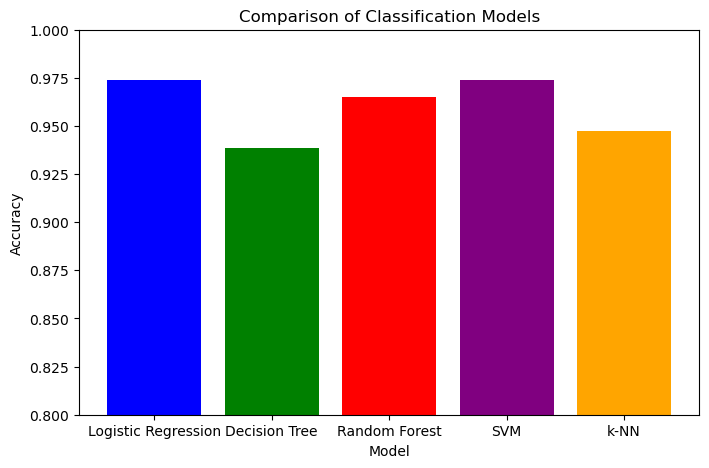

In [21]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Models")
plt.ylim(0.8, 1.0)  # Since accuracy is high, adjust limits
plt.show()